analytics model

In [ ]:
#download une dataset from kaggel
!unzip archive.zip
#unzip the dataset

In [ ]:
import pandas as pd
df = pd.read_csv('x.csv',index_col=0, encoding='windows-1252')

df

In [ ]:

df.isna().sum()

Video Views                                0
Video Title                                0
Channel URL                                0
Creator Name                              11
Creator Gender                           314
Total Channel Subcribers                   0
Total Chanel Views                         0
Duration of Video                          0
Duration in Seconds                        0
Date of Video Upload                       0
No of Likes                                1
Language of the Video                     21
Subtitle                                   1
Video Description                          0
Hashtags                                   0
No of Comments                             0
Date of the Last Comment                  24
Maximum Quality of the Video               0
No of Videos the Channel                   0
No of Playlist                             9
Premiered or Not                           0
Community Engagement (Posts per week)      0
Intern Who

In [ ]:
df = df.dropna(axis=0, subset=['Creator Gender'])

In [ ]:
df
df.isna().sum()

In [ ]:
df.duplicated().sum()
df.shape

(194, 23)

In [ ]:
df.reset_index() 

In [ ]:
print(type(df["Video Views"].values[0]))

In [ ]:
from numpy import NaN
def rep(x):
  ch=''
  for i in range(len(x)):
    if x[i]!=',':
      #print(x[i])
      ch+=str(x[i])
  return ch

for i in range(591):
  ch=rep(str(df['Video Views'][i]));ch=int(ch)
  if(round(ch,-7)!=0):
    df['Video Views'][i]=round(ch,-7)
  else:
    df['Video Views'][i]=NaN

df['Video Views']
df.isna().sum()
df = df.dropna(axis=0, subset=['Video Views'])
df

<ipython-input-444-bb2373287a31>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Video Views'][i]=NaN
<ipython-input-444-bb2373287a31>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Video Views'][i]=round(ch,-7)


,Video Views,Video Title,Channel URL,Creator Name,Creator Gender,Total Channel Subcribers,Total Chanel Views,Duration of Video,Duration in Seconds,Date of Video Upload,...,Video Description,Hashtags,No of Comments,Date of the Last Comment,Maximum Quality of the Video,No of Videos the Channel,No of Playlist,Premiered or Not,Community Engagement (Posts per week),Intern Who Collected the Data
Video Link,,,,,,,,,,,,,,,,,,,,,
https://www.youtube.com/watch?v=0BBROgyHlFE,10000000,ROUNDER GLUTES: 5 Mistakes Keeping Your Butt Flat,https://www.youtube.com/c/JeremyEthier,Jeremy Ethier,Male,4690000,511124108,00:09:43,583.00,03-07-2022,...,Yes,0,1558,21-09-2022,1080,216,8.0,No,0,prateek
https://www.youtube.com/watch?v=0jUj3rfO7eM,50000000,THARA BHAiiiii,CarryMinati - YouTube,Ajey,Male,36800000,3013145951,0:14:32,872.00,1/19/2022,...,Yes,0,344247,9/21/2022,1080,179,8.0,No,1,Rahul Singh
https://www.youtube.com/watch?v=0Kx3sobEBFE,90000000,Camila Cabello - Don't Go Yet (Official Video),https://www.youtube.com/channel/UCk0wwaFCIkxwS...,Camila Cabello,Female,160000000,6165551266,0:03:02,182.00,7/31/2021,...,Yes,2,15842,9/22/2022,1080,180,41.0,No,2,Syed safdar
https://www.youtube.com/watch?v=11vxt-Bo51Y&t=106s,10000000,I opened free 5 star hotels for poor,https://www.youtube.com/c/HarshaSaiForYou,Harsha Sai - For You Telugu,Male,7060000,665465558,00:19:49,"1,189.00",8/3/2022,...,Yes,1,78759,9/4/2022,2160,108,11.0,No,1,Akhil Teja
https://www.youtube.com/watch?v=1BpYbEi2QcI,10000000,Do 100 PUSH UPS A Day | Life Changing,https://www.youtube.com/c/CHRISHERIA,Chris Heria,Male,4200000,310394965,00:13:28,808.00,30-10-2020,...,Yes,0,6603,21-09-2022,1080,253,20.0,No,1,prateek
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://youtu.be/ym4uVS-5tSA,110000000,10 Roads You Would Never Want to Drive On,(14) TheRichest - YouTube,The Richest,Male,15100000,2927451583,00:06:23,383.00,10/29/2015,...,Yes,0,12090,9/23/2022,1080,2200,23.0,No,7,Aakash Dodia
https://youtu.be/yzXS2Nj7GVQ,10000000,The Best Performances Of The Decade Decoded Fi...,https://www.youtube.com/c/TheFilmCompanion,Anupama Chopra,Female,1430000,406566113,01:17:23,"4,643.00",11/25/2019,...,Yes,3,40803,9/28/2021,1080,2600,100.0,Yes,0,Sanjay Lakshmanan
https://youtu.be/zAICu_dIlUs,10000000,Easy Tawa Pizza | ??? ?????? ?????? | Pizza at...,https://www.youtube.com/c/ChefRanveer,Chef Ranveer,Male,538000,646530374,00:13:30,810.00,2/25/2020,...,Yes,10,9254,9/23/2022,1080,632,75.0,No,21,Aakash Dodia


In [ ]:
!pip install word_tokenize

In [445]:
import random
from datetime import date


def remp(e,i):
  e["nb vues"]=df['Video Views'].values.tolist()[i];
  
  time_str = df['Duration of Video'].values.tolist()[i][:-1];
  time_obj = datetime.datetime.strptime(time_str, '%H:%M:%S').time()

  total_seconds = (time_obj.hour * 3600) + (time_obj.minute * 60) + time_obj.second

  e["Duree"]=total_seconds//60;
  ch=df['Date of Video Upload'].values.tolist()[i].replace('-','/')
  ch=ch.split('/');
  j=ch[0];m=ch[1];a=ch[2]
  date = pd.Timestamp(f'{j}-{m}-{a}')
  e["day"]=date.day_name()
  e["Q"]=df["Maximum Quality of the Video"].values.tolist()[i]

  return e


titels=df["Video Title"].values.tolist()
#titels
Food,Travel,Technology,Education,Beauty,Comedy,Music,Gaming=[],[],[],[],[],[],[],[]
for i in range(len(titels)):
  num = random.randint(0, 7);
  e={}
  if(num==0):
      e=remp(e,i)
      Food.append(e)
  elif(num==1):
      e=remp(e,i)
      Travel.append(e)
  elif(num==2):
      e=remp(e,i)
      Technology.append(e)
  elif(num==3):
      e=remp(e,i)
      Education.append(e)
  elif(num==4):
      e=remp(e,i)
      Beauty.append(e)
  elif(num==5):
      e=remp(e,i)
      Comedy.append(e)
  elif(num==6):
      e=remp(e,i)
      Music.append(e)
  elif(num==7):
      e=remp(e,i)
      Gaming.append(e)


In [ ]:
import pandas as pd



dfood = pd.DataFrame(Food)
dfood = dfood.dropna(axis=0, subset=['nb vues'])
dmusic = pd.DataFrame(Music)
dmusic = dmusic.dropna(axis=0, subset=['nb vues'])
dtravel = pd.DataFrame(Travel)
dtravel = dtravel.dropna(axis=0, subset=['nb vues'])
dtechno = pd.DataFrame(Technology)
dtechno = dtechno.dropna(axis=0, subset=['nb vues'])
dgaming = pd.DataFrame(Gaming)
dgaming = dgaming.dropna(axis=0, subset=['nb vues'])
dcomedy = pd.DataFrame(Comedy)
dcomedy = dcomedy.dropna(axis=0, subset=['nb vues'])
dbe = pd.DataFrame(Beauty)
dbe = dbe.dropna(axis=0, subset=['nb vues'])
ded = pd.DataFrame(Education)
ded = ded.dropna(axis=0, subset=['nb vues'])
#ded

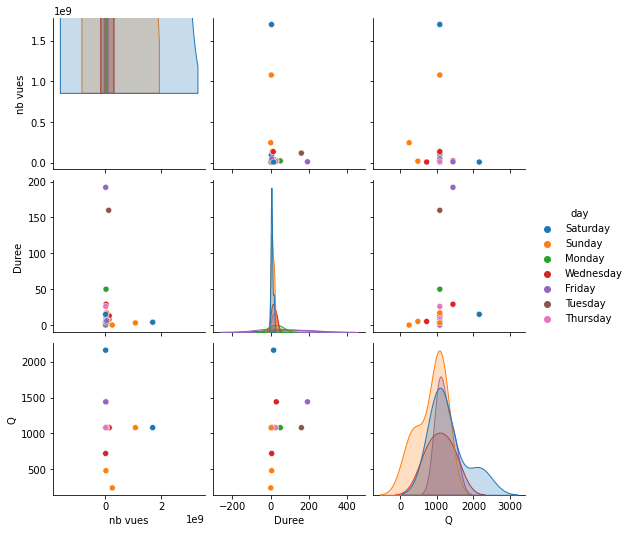

In [ ]:
import seaborn as sns
# pair plotting each two attributes and differentiating between the different nobel prize categories
sns.pairplot(dfood,hue="day")

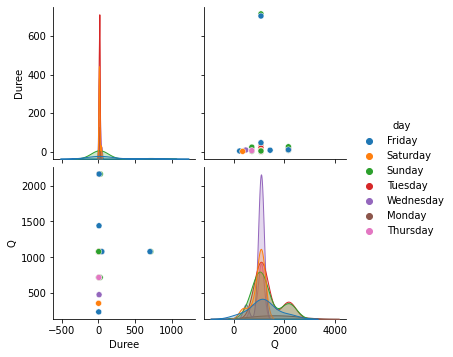

In [ ]:
sns.pairplot(ded,hue="day")

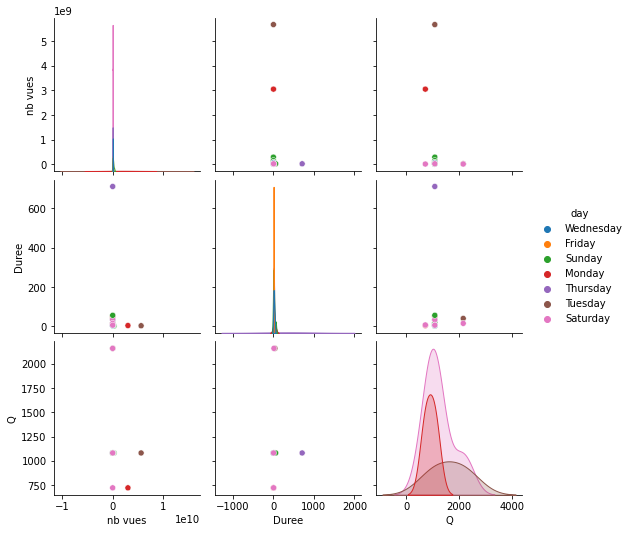

In [ ]:
sns.pairplot(dcomedy,hue="day")

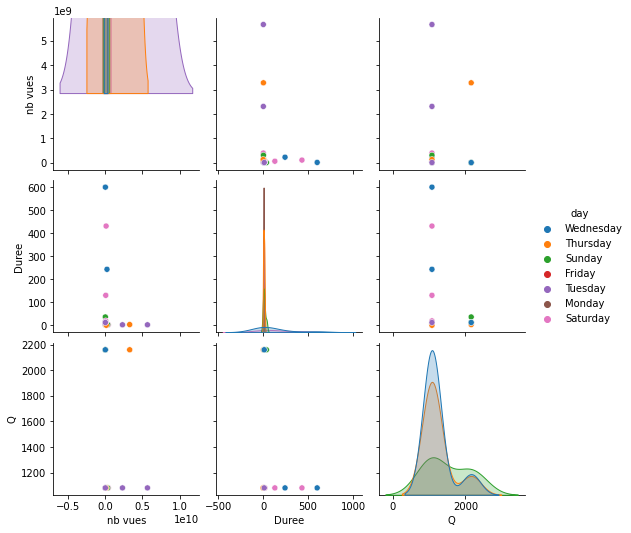

In [ ]:
sns.pairplot(dgaming,hue="day")

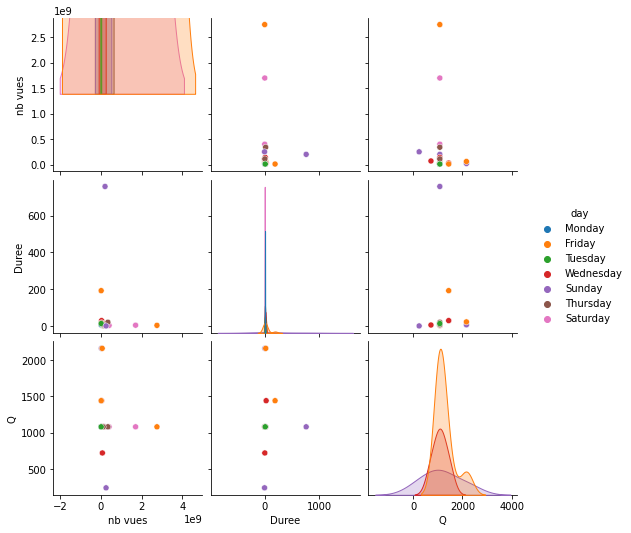

In [ ]:
sns.pairplot(dtravel,hue="day")

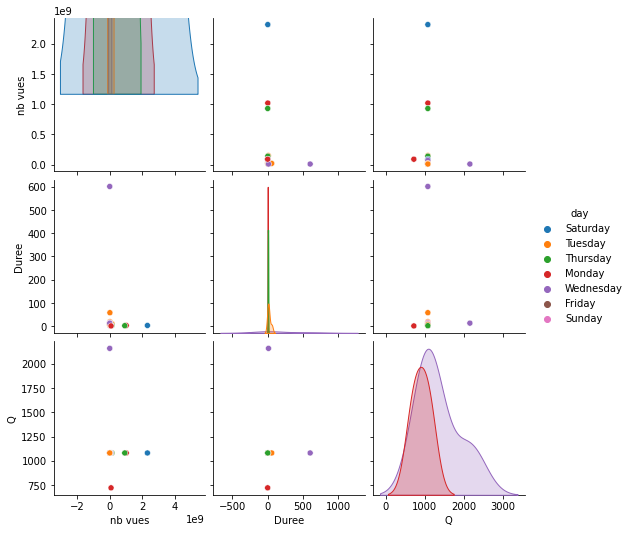

In [ ]:
sns.pairplot(dtechno,hue="day")

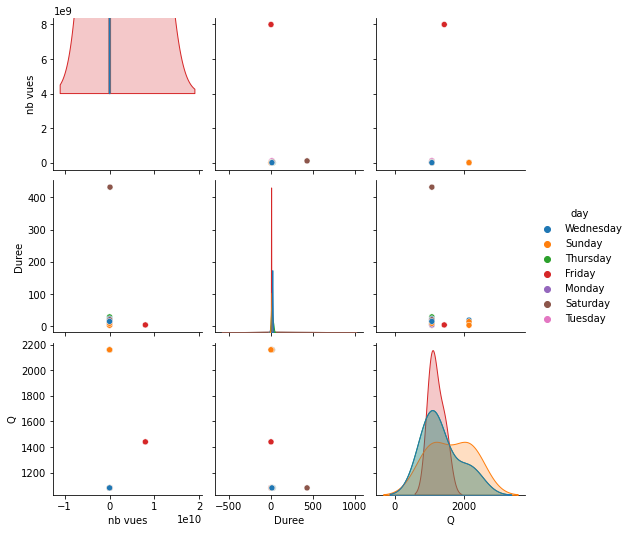

In [ ]:
sns.pairplot(dmusic,hue="day")

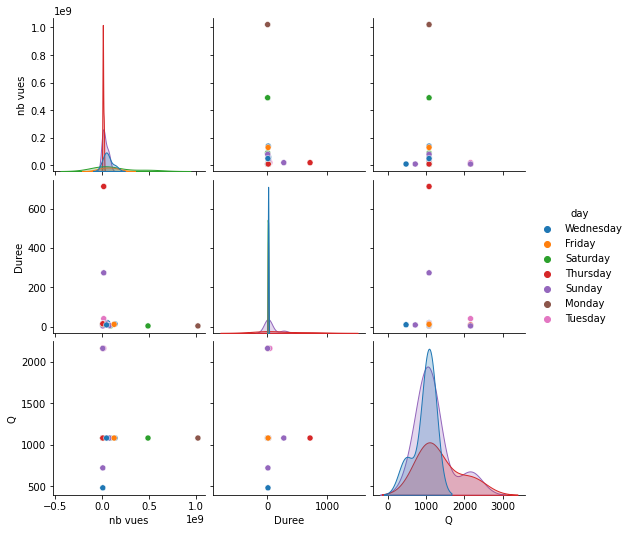

In [ ]:
sns.pairplot(dbe,hue="day")

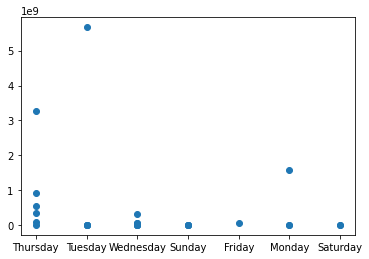

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(dfood['day'],dfood['nb vues'])

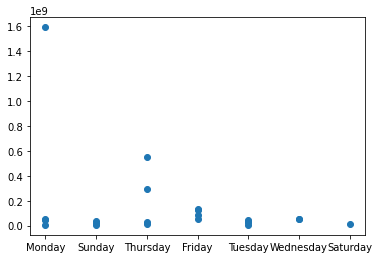

In [ ]:
plt.scatter(ded['day'],ded['nb vues'])

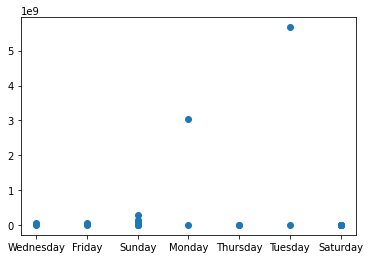

In [ ]:
plt.scatter(dcomedy['day'],dcomedy['nb vues'])

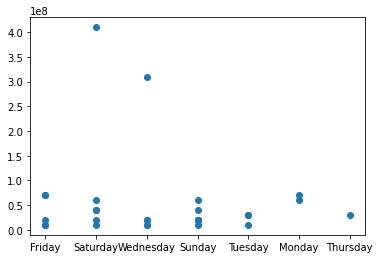

In [ ]:
plt.scatter(dgaming['day'],dgaming['nb vues'])

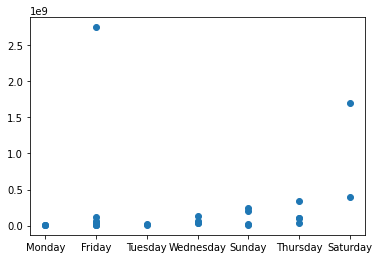

In [ ]:
plt.scatter(dtravel['day'],dtravel['nb vues'])

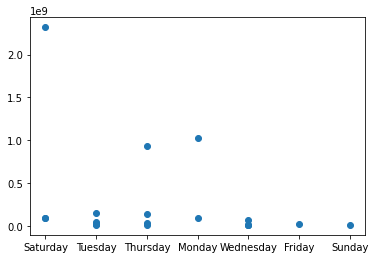

In [ ]:
plt.scatter(dtechno['day'],dtechno['nb vues'])

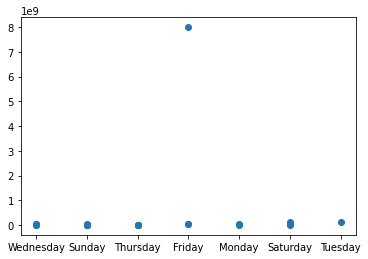

In [ ]:
plt.scatter(dmusic['day'],dmusic['nb vues'])

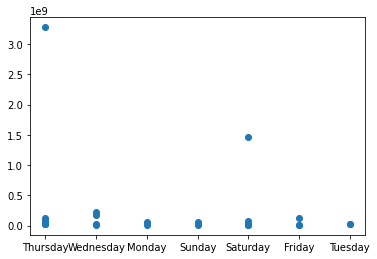

In [ ]:
plt.scatter(dbe['day'],dbe['nb vues'])

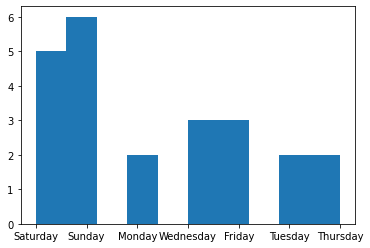

In [ ]:
plt.hist(dfood[dfood['nb vues'] !=-1 ]['day'])
plt.show()

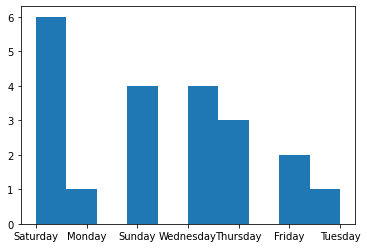

In [ ]:
plt.hist(dbe[dbe['nb vues'] !=-1 ]['day'])
plt.show()

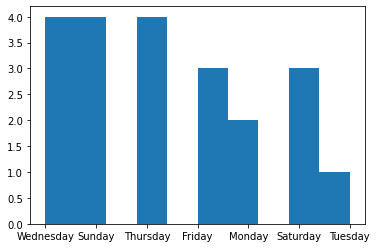

In [ ]:
plt.hist(dmusic[dmusic['nb vues'] !=-1 ]['day'])
plt.show()

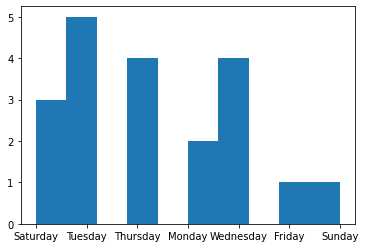

In [ ]:
plt.hist(dtechno[dtechno['nb vues'] !=-1 ]['day'])
plt.show()

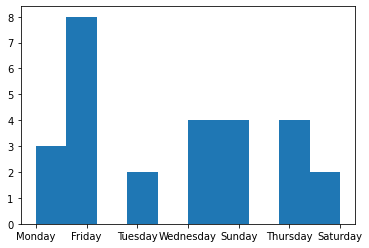

In [ ]:
plt.hist(dtravel[dtravel['nb vues'] !=-1 ]['day'])
plt.show()

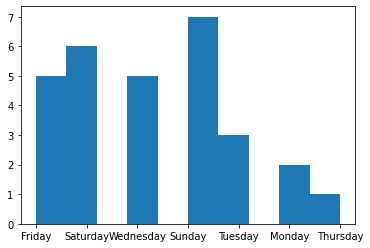

In [ ]:
plt.hist(dgaming[dgaming['nb vues'] !=-1 ]['day'])
plt.show()

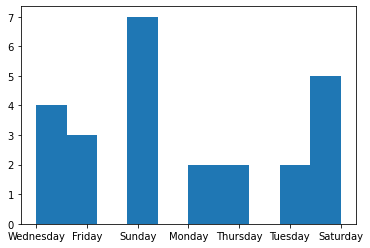

In [ ]:
plt.hist(dcomedy[dcomedy['nb vues'] !=-1 ]['day'])
plt.show()

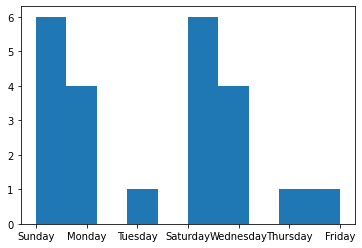

In [ ]:
plt.hist(ded[ded['nb vues'] !=-1 ]['day'])
plt.show()